## Bayesian Hierarchical Clustering 

Two cases have been explored with reference to Zoo data set

## Case 1: 

Data containing zoodata features without class


## Case 2:

Data containing zoodata features with class

As per data information, we should have 7 different classes 





Attribute Information:

1. animal name: Unique for each instance
2. hair: Boolean
3. feathers: Boolean
4. eggs: Boolean
5. milk: Boolean
6. airborne: Boolean
7. aquatic: Boolean
8. predator: Boolean
9. toothed: Boolean
10. backbone: Boolean
11. breathes: Boolean
12. venomous: Boolean
13. fins: Boolean
14. legs: Numeric (set of values: {0,2,4,5,6,8})
15. tail: Boolean
16. domestic: Boolean
17. catsize: Boolean
18. type: Numeric (integer values in range [1,7])

In [1]:
#Downloading BHC package

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(version = "3.12")

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)



In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install()

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)



In [7]:
install.packages("argparse")

Installing package into 'C:/Users/pavle/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependency 'findpython'




package 'findpython' successfully unpacked and MD5 sums checked
package 'argparse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pavle\AppData\Local\Temp\RtmpWSqRiJ\downloaded_packages


In [162]:
#list of all libraries needed for the code
library(BHC)
library(argparse)
library(RColorBrewer)
library(BHC)
library(parallel)


## Case 1

In [163]:
file='C:/Users/pavle/Downloads/BHCDATA/zoodatawithoutclass1.csv'

In [164]:
parser = ArgumentParser()
parser$add_argument('file', nargs=1, help='CSV with gene expression, first column gene names, first row time points')
parser$add_argument('--Pool', dest='pool', type='integer', default=0, help='Number of threads for BHC parallelisation. Default: 0 (automatic parallelisation)')
parser$add_argument('--Mode', dest='mode', default='multinomial', help='Mode of operation (multinomial/time-course). Default: multinomial')
parser$add_argument('--MakeHeatmap', dest='heatmap', action='store_true', help='Flag. If specified, a heatmap of the resulting clustering will be produced')
args = parser$parse_args(file)


In [165]:
#toy around with pool
if (args$pool==0)
{
	args$pool = detectCores()
}

In [166]:
#basic data prep
data = read.csv(args$file,header=TRUE,row.names=1,check.names=FALSE)
#data=read.csv(args$file,header=TRUE)
genes = rownames(data)
samples = colnames(data)
data = data.matrix(data)
#standardise data
standardisedData = (data-mean(data))/sd(data)

In [167]:
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0


In [168]:
genes

[1] "aardvark" "antelope" "bass"     "bear"     "boar"     "buffalo" 
  [7] "calf"     "carp"     "catfish"  "cavy"     "cheetah"  "chicken" 
 [13] "chub"     "clam"     "crab"     "crayfish" "crow"     "deer"    
 [19] "dogfish"  "dolphin"  "dove"     "duck"     "elephant" "flamingo"
 [25] "flea"     "frog"     "frogg"    "fruitbat" "giraffe"  "girl"    
 [31] "gnat"     "goat"     "gorilla"  "gull"     "haddock"  "hamster" 
 [37] "hare"     "hawk"     "herring"  "honeybee" "housefly" "kiwi"    
 [43] "ladybird" "lark"     "leopard"  "lion"     "lobster"  "lynx"    
 [49] "mink"     "mole"     "mongoose" "moth"     "newt"     "octopus" 
 [55] "opossum"  "oryx"     "ostrich"  "parakeet" "penguin"  "pheasant"
 [61] "pike"     "piranha"  "pitviper" "platypus" "polecat"  "pony"    
 [67] "porpoise" "puma"     "pussycat" "raccoon"  "reindeer" "rhea"    
 [73] "scorpion" "seahorse" "seal"     "sealion"  "seasnake" "seawasp" 
 [79] "skimmer"  "skua"     "slowworm" "slug"     "sole"     "sparrow" 
 [85] "squirrel" "starfish" "stingray" "swan"     "termite"  "toad"    
 [91] "tortoise" "tuatara"  "tuna"     "vampire"  "vole"     "vulture" 
 [97] "wallaby"  "wasp"     "wolf"     "worm"     "wren"

In [169]:
#BHC runs proper
if (args$mode == 'multinomial')
{
	#data discretisation
	percentiles = FindOptimalBinning(data, genes, transposeData=TRUE, verbose=TRUE)
	discreteData = DiscretiseData(t(data), percentiles=percentiles)
	discreteData = t(discreteData)
	hc = bhc(discreteData, genes, dataType=args$mode, numThreads=args$pool, verbose=TRUE)
	}



DATA DISCRETISATION
-------------------
Percentiles: 0.1 0.8 0.1 
We have the following parameters for the data array:
nGenes:       101
nExperiments: 16
***Please check that these are the right way round! (it affects the discretisation)***

Discretisation logEvidence: 371.202331038049
(Need to add this to the model logEvidence)
-------------------
[1] Running Bayesian Hierarchical Clustering....
[1] "DataType: multinomial"
[1] Optimising global hyperparameter...
[1]    1.072949 -970.586464
[1]    1.427051 -968.954992
[1]    1.427051 -968.954992
[1]    1.427051 -968.954992
[1] Hyperparameter: 1.42705098312484
[1] Lower bound on overall LogEvidence: -9.6895e+02
[1] *******************

DATA DISCRETISATION
-------------------
Percentiles: 0.15 0.7 0.15 
We have the following parameters for the data array:
nGenes:       101
nExperiments: 16
***Please check that these are the right way round! (it affects the discretisation)***

Discretisation logEvidence: 371.202331038049
(Need to add thi

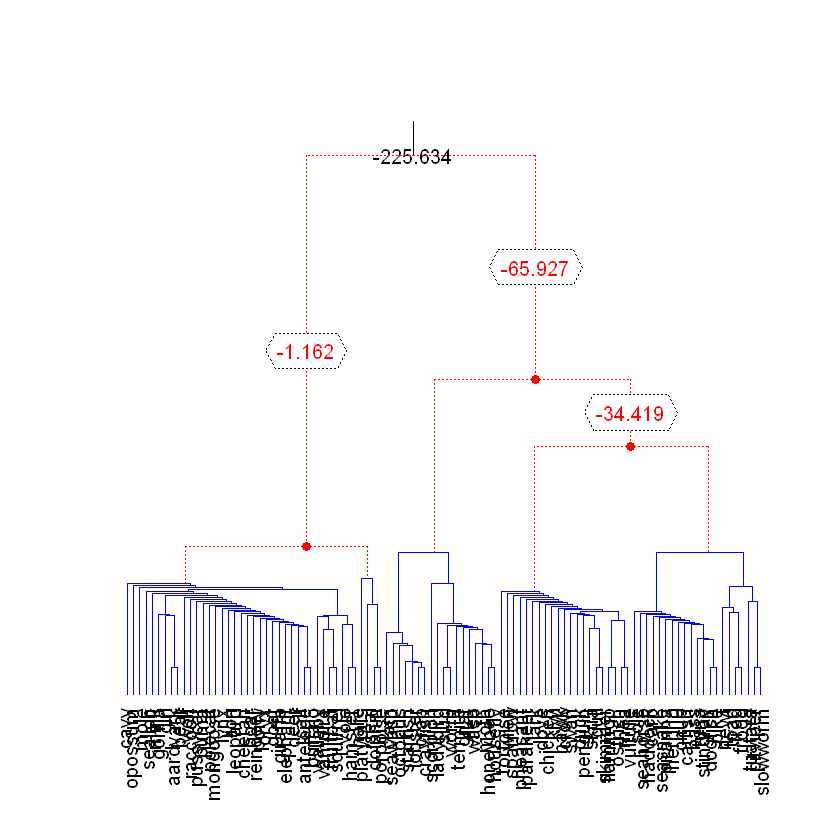

In [172]:

plot(hc,axes=FALSE)

In [173]:
#write out clusters
WriteOutClusterLabels(hc, 'clusterswithoutclass.txt', verbose=TRUE)


[1] ---CLUSTER 1 ---
[1] cavy
[1] opossum
[1] mole
[1] sealion
[1] mink
[1] gorilla
[1] girl
[1] aardvark
[1] bear
[1] wolf
[1] raccoon
[1] pussycat
[1] puma
[1] polecat
[1] mongoose
[1] lynx
[1] lion
[1] leopard
[1] cheetah
[1] boar
[1] reindeer
[1] pony
[1] oryx
[1] goat
[1] giraffe
[1] elephant
[1] deer
[1] calf
[1] antelope
[1] buffalo
[1] wallaby
[1] vampire
[1] fruitbat
[1] squirrel
[1] vole
[1] hamster
[1] hare
[1] ---CLUSTER 2 ---
[1] platypus
[1] seal
[1] dolphin
[1] porpoise
[1] ---CLUSTER 3 ---
[1] clam
[1] seawasp
[1] octopus
[1] starfish
[1] lobster
[1] crab
[1] crayfish
[1] scorpion
[1] ladybird
[1] slug
[1] worm
[1] termite
[1] gnat
[1] flea
[1] wasp
[1] moth
[1] honeybee
[1] housefly
[1] ---CLUSTER 4 ---
[1] tortoise
[1] wren
[1] sparrow
[1] pheasant
[1] parakeet
[1] lark
[1] dove
[1] chicken
[1] kiwi
[1] hawk
[1] crow
[1] swan
[1] duck
[1] penguin
[1] skua
[1] gull
[1] skimmer
[1] flamingo
[1] ostrich
[1] rhea
[1] vulture
[1] ---CLUSTER 5 ---
[1] sole
[1] seahorse
[1] 

## Actual Clustering should have been

#### 1 -- (41) aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby,wolf

#### 2 -- (20) chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren
#### 3 -- (5) pitviper, seasnake, slowworm, tortoise, tuatara
#### 4 -- (13) bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna
#### 5 -- (4) frog, frogg, newt, toad
#### 6 -- (8) flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp
#### 7 -- (10) clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm

In [174]:
# if we give the class variable along with the data

file='C:/Users/pavle/Downloads/BHCDATA/zoodata1.csv'

In [175]:
parser = ArgumentParser()
parser$add_argument('file', nargs=1, help='CSV with gene expression, first column gene names, first row time points')
parser$add_argument('--Pool', dest='pool', type='integer', default=0, help='Number of threads for BHC parallelisation. Default: 0 (automatic parallelisation)')
parser$add_argument('--Mode', dest='mode', default='multinomial', help='Mode of operation (multinomial/time-course). Default: multinomial')
parser$add_argument('--MakeHeatmap', dest='heatmap', action='store_true', help='Flag. If specified, a heatmap of the resulting clustering will be produced')
args = parser$parse_args(file)

In [176]:
#toy around with pool
if (args$pool==0)
{
	args$pool = detectCores()
}

In [177]:
#basic data prep
data = read.csv(args$file,header=TRUE,row.names=1,check.names=FALSE)
#data=read.csv(args$file)
genes = rownames(data)
samples = colnames(data)
data = data.matrix(data)
#standardise data
standardisedData = (data-mean(data))/sd(data)

In [178]:
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [179]:
#BHC runs proper
if (args$mode == 'multinomial')
{
	#data discretisation
	percentiles = FindOptimalBinning(data, genes, transposeData=TRUE, verbose=TRUE)
	discreteData = DiscretiseData(t(data), percentiles=percentiles)
	discreteData = t(discreteData)
	hc = bhc(discreteData, genes, dataType=args$mode, numThreads=args$pool, verbose=TRUE)
	
	}




DATA DISCRETISATION
-------------------
Percentiles: 0.1 0.8 0.1 
We have the following parameters for the data array:
nGenes:       101
nExperiments: 17
***Please check that these are the right way round! (it affects the discretisation)***

Discretisation logEvidence: -283.073168802119
(Need to add this to the model logEvidence)
-------------------
[1] Running Bayesian Hierarchical Clustering....
[1] "DataType: multinomial"
[1] Optimising global hyperparameter...
[1]    0.8411863 -721.6875740
[1]    1.283814 -742.528023
[1]    0.5078529 -702.2512576
[1]    0.5078529 -702.2512576
[1]    0.5078529 -702.2512576
[1] Hyperparameter: 0.507852925225962
[1] Lower bound on overall LogEvidence: -7.0225e+02
[1] *******************

DATA DISCRETISATION
-------------------
Percentiles: 0.15 0.7 0.15 
We have the following parameters for the data array:
nGenes:       101
nExperiments: 17
***Please check that these are the right way round! (it affects the discretisation)***

Discretisation logEvide

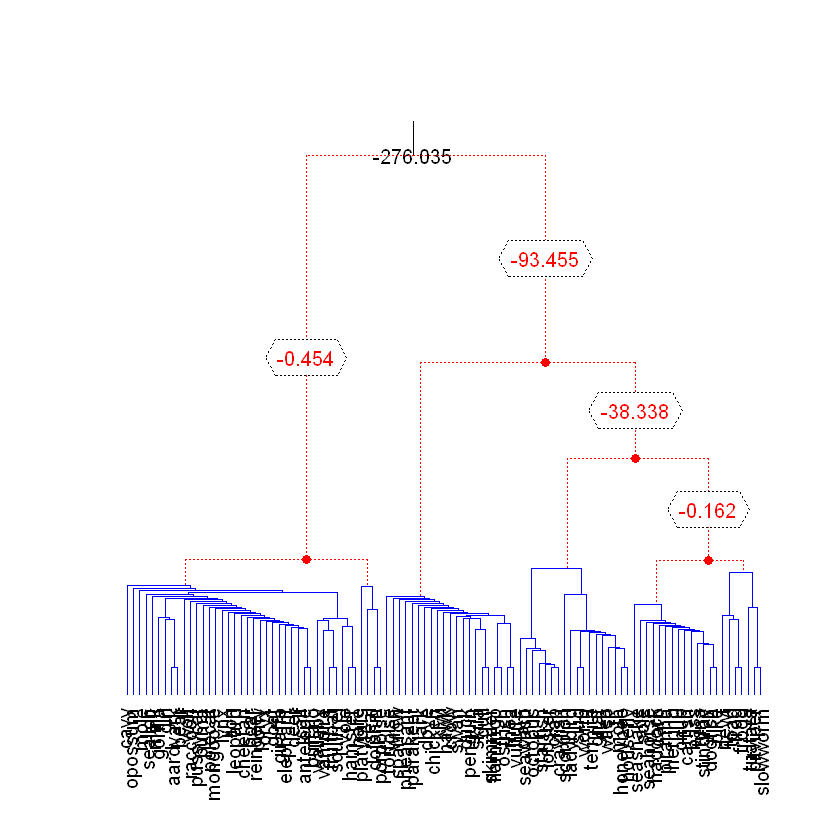

In [180]:
#Dendogram plot
plot(hc, axes=FALSE)

In [181]:
#write out clusters
WriteOutClusterLabels(hc, 'clusterswithclass.txt', verbose=TRUE)

[1] ---CLUSTER 1 ---
[1] cavy
[1] opossum
[1] mole
[1] sealion
[1] mink
[1] gorilla
[1] girl
[1] aardvark
[1] bear
[1] wolf
[1] raccoon
[1] pussycat
[1] puma
[1] polecat
[1] mongoose
[1] lynx
[1] lion
[1] leopard
[1] cheetah
[1] boar
[1] reindeer
[1] pony
[1] oryx
[1] goat
[1] giraffe
[1] elephant
[1] deer
[1] calf
[1] antelope
[1] buffalo
[1] wallaby
[1] vampire
[1] fruitbat
[1] squirrel
[1] vole
[1] hamster
[1] hare
[1] ---CLUSTER 2 ---
[1] platypus
[1] seal
[1] dolphin
[1] porpoise
[1] ---CLUSTER 3 ---
[1] tortoise
[1] wren
[1] sparrow
[1] pheasant
[1] parakeet
[1] lark
[1] dove
[1] chicken
[1] kiwi
[1] hawk
[1] crow
[1] swan
[1] duck
[1] penguin
[1] skua
[1] gull
[1] skimmer
[1] flamingo
[1] ostrich
[1] rhea
[1] vulture
[1] ---CLUSTER 4 ---
[1] clam
[1] seawasp
[1] octopus
[1] starfish
[1] lobster
[1] crab
[1] crayfish
[1] scorpion
[1] ladybird
[1] slug
[1] worm
[1] termite
[1] gnat
[1] flea
[1] wasp
[1] moth
[1] honeybee
[1] housefly
[1] ---CLUSTER 5 ---
[1] seasnake
[1] sole
[1] 

###  How strongly does the algorithm clustering adhere to the hypothesis that the data coming from the distribution model with same parameters should be in similar cluster

### Why the alogrithm crashes when we take individual points and not as time series of points coming from a distribution?

### Could more features or data points in one row could be helpful in clear clustering

### Does giving class names as having some ordinal property affect the result in any way if we also add cluster class as one of the features